In [25]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [159]:
df = pd.read_csv('crime.csv',encoding='latin-1')
print(df.columns)
print(df.shape)

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')
(319073, 17)


In [161]:
columns_keep = [
    'OFFENSE_CODE',
    'OFFENSE_DESCRIPTION',
    'OCCURRED_ON_DATE',
    'YEAR',
    'MONTH',
    'DAY_OF_WEEK',
]
df = df[columns_keep]
print(df.shape)

(319073, 6)


In [163]:
col_mapping = {
    'OFFENSE_CODE': 'offense_code',
    'OFFENSE_DESCRIPTION': 'description',
    'OCCURRED_ON_DATE': 'date',
    'YEAR': 'year',
    'MONTH' : 'month',
    'DAY_OF_WEEK': 'day_of_week',
}
df.rename(columns=col_mapping, inplace=True)

In [165]:
df

,offense_code,description,date,year,month,day_of_week
0,619,LARCENY ALL OTHERS,2018-09-02 13:00:00,2018,9,Sunday
1,1402,VANDALISM,2018-08-21 00:00:00,2018,8,Tuesday
2,3410,TOWED MOTOR VEHICLE,2018-09-03 19:27:00,2018,9,Monday
3,3114,INVESTIGATE PROPERTY,2018-09-03 21:16:00,2018,9,Monday
4,3114,INVESTIGATE PROPERTY,2018-09-03 21:05:00,2018,9,Monday
...,...,...,...,...,...,...
319068,3125,WARRANT ARREST,2016-06-05 17:25:00,2016,6,Sunday
319069,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",2015-07-09 13:38:00,2015,7,Thursday
319070,3125,WARRANT ARREST,2015-07-09 13:38:00,2015,7,Thursday
319071,3125,WARRANT ARREST,2016-05-31 19:35:00,2016,5,Tuesday


In [167]:
unique_list = df.duplicated(keep=False)
unique_list

0         False
1         False
2         False
3         False
4         False
          ...  
319068    False
319069    False
319070    False
319071    False
319072    False
Length: 319073, dtype: bool

In [169]:
df[df.duplicated(keep=False)]
df

,offense_code,description,date,year,month,day_of_week
0,619,LARCENY ALL OTHERS,2018-09-02 13:00:00,2018,9,Sunday
1,1402,VANDALISM,2018-08-21 00:00:00,2018,8,Tuesday
2,3410,TOWED MOTOR VEHICLE,2018-09-03 19:27:00,2018,9,Monday
3,3114,INVESTIGATE PROPERTY,2018-09-03 21:16:00,2018,9,Monday
4,3114,INVESTIGATE PROPERTY,2018-09-03 21:05:00,2018,9,Monday
...,...,...,...,...,...,...
319068,3125,WARRANT ARREST,2016-06-05 17:25:00,2016,6,Sunday
319069,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",2015-07-09 13:38:00,2015,7,Thursday
319070,3125,WARRANT ARREST,2015-07-09 13:38:00,2015,7,Thursday
319071,3125,WARRANT ARREST,2016-05-31 19:35:00,2016,5,Tuesday


In [179]:
df.isnull().sum()#Removed 3 rows. District, Street , and Shootings

offense_code    0
description     0
date            0
year            0
month           0
day_of_week     0
dtype: int64

In [177]:
df.describe()

,offense_code,year,month
count,319073.000000,319073.000000,319073.000000
mean,2317.546956,2016.560586,6.609719
std,1185.285543,0.996344,3.273691
min,111.000000,2015.000000,1.000000
25%,1001.000000,2016.000000,4.000000
50%,2907.000000,2017.000000,7.000000
75%,3201.000000,2017.000000,9.000000
max,3831.000000,2018.000000,12.000000


In [181]:
df['year'] = pd.to_datetime(df['year'])
max_dates = df.groupby('offense_code')['year'].max().reset_index()
print(type(max_dates))
print('this is our series', max_dates)
max_dates

df['max_date'] = df.apply(lambda row: row['year'] == max_dates[max_dates['offense_code'] == row['offense_code']]['year'].values[0], axis=1)


<class 'pandas.core.frame.DataFrame'>
this is our series      offense_code                          year
0             111 1970-01-01 00:00:00.000002018
1             112 1970-01-01 00:00:00.000002016
2             121 1970-01-01 00:00:00.000002017
3             123 1970-01-01 00:00:00.000002017
4             301 1970-01-01 00:00:00.000002018
..            ...                           ...
217          3811 1970-01-01 00:00:00.000002018
218          3820 1970-01-01 00:00:00.000002018
219          3821 1970-01-01 00:00:00.000002018
220          3830 1970-01-01 00:00:00.000002018
221          3831 1970-01-01 00:00:00.000002018

[222 rows x 2 columns]


In [184]:
df

,offense_code,description,date,year,month,day_of_week,max_date
0,619,LARCENY ALL OTHERS,2018-09-02 13:00:00,1970-01-01 00:00:00.000002018,9,Sunday,True
1,1402,VANDALISM,2018-08-21 00:00:00,1970-01-01 00:00:00.000002018,8,Tuesday,True
2,3410,TOWED MOTOR VEHICLE,2018-09-03 19:27:00,1970-01-01 00:00:00.000002018,9,Monday,True
3,3114,INVESTIGATE PROPERTY,2018-09-03 21:16:00,1970-01-01 00:00:00.000002018,9,Monday,True
4,3114,INVESTIGATE PROPERTY,2018-09-03 21:05:00,1970-01-01 00:00:00.000002018,9,Monday,True
...,...,...,...,...,...,...,...
319068,3125,WARRANT ARREST,2016-06-05 17:25:00,1970-01-01 00:00:00.000002016,6,Sunday,False
319069,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",2015-07-09 13:38:00,1970-01-01 00:00:00.000002015,7,Thursday,False
319070,3125,WARRANT ARREST,2015-07-09 13:38:00,1970-01-01 00:00:00.000002015,7,Thursday,False
319071,3125,WARRANT ARREST,2016-05-31 19:35:00,1970-01-01 00:00:00.000002016,5,Tuesday,False


In [187]:
df = df[df['max_date'] == True]#.copy()
df

,offense_code,description,date,year,month,day_of_week,max_date
0,619,LARCENY ALL OTHERS,2018-09-02 13:00:00,1970-01-01 00:00:00.000002018,9,Sunday,True
1,1402,VANDALISM,2018-08-21 00:00:00,1970-01-01 00:00:00.000002018,8,Tuesday,True
2,3410,TOWED MOTOR VEHICLE,2018-09-03 19:27:00,1970-01-01 00:00:00.000002018,9,Monday,True
3,3114,INVESTIGATE PROPERTY,2018-09-03 21:16:00,1970-01-01 00:00:00.000002018,9,Monday,True
4,3114,INVESTIGATE PROPERTY,2018-09-03 21:05:00,1970-01-01 00:00:00.000002018,9,Monday,True
...,...,...,...,...,...,...,...
319045,403,ASSAULT & BATTERY D/W - OTHER,2016-06-14 09:40:00,1970-01-01 00:00:00.000002016,6,Tuesday,True
319052,629,LARCENY OTHER $50 TO $199,2016-06-05 17:23:00,1970-01-01 00:00:00.000002016,6,Sunday,True
319058,2910,VAL - OPERATING AFTER REV/SUSP.,2016-07-29 18:20:00,1970-01-01 00:00:00.000002016,7,Friday,True
319066,1864,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,2018-01-27 14:01:00,1970-01-01 00:00:00.000002018,1,Saturday,True


In [189]:
df.reset_index(drop=True, inplace=True)
df

,offense_code,description,date,year,month,day_of_week,max_date
0,619,LARCENY ALL OTHERS,2018-09-02 13:00:00,1970-01-01 00:00:00.000002018,9,Sunday,True
1,1402,VANDALISM,2018-08-21 00:00:00,1970-01-01 00:00:00.000002018,8,Tuesday,True
2,3410,TOWED MOTOR VEHICLE,2018-09-03 19:27:00,1970-01-01 00:00:00.000002018,9,Monday,True
3,3114,INVESTIGATE PROPERTY,2018-09-03 21:16:00,1970-01-01 00:00:00.000002018,9,Monday,True
4,3114,INVESTIGATE PROPERTY,2018-09-03 21:05:00,1970-01-01 00:00:00.000002018,9,Monday,True
...,...,...,...,...,...,...,...
65754,403,ASSAULT & BATTERY D/W - OTHER,2016-06-14 09:40:00,1970-01-01 00:00:00.000002016,6,Tuesday,True
65755,629,LARCENY OTHER $50 TO $199,2016-06-05 17:23:00,1970-01-01 00:00:00.000002016,6,Sunday,True
65756,2910,VAL - OPERATING AFTER REV/SUSP.,2016-07-29 18:20:00,1970-01-01 00:00:00.000002016,7,Friday,True
65757,1864,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,2018-01-27 14:01:00,1970-01-01 00:00:00.000002018,1,Saturday,True


In [193]:
df = df.drop(['max_date'], axis=1)
df

,offense_code,description,date,year,month,day_of_week
0,619,LARCENY ALL OTHERS,2018-09-02 13:00:00,1970-01-01 00:00:00.000002018,9,Sunday
1,1402,VANDALISM,2018-08-21 00:00:00,1970-01-01 00:00:00.000002018,8,Tuesday
2,3410,TOWED MOTOR VEHICLE,2018-09-03 19:27:00,1970-01-01 00:00:00.000002018,9,Monday
3,3114,INVESTIGATE PROPERTY,2018-09-03 21:16:00,1970-01-01 00:00:00.000002018,9,Monday
4,3114,INVESTIGATE PROPERTY,2018-09-03 21:05:00,1970-01-01 00:00:00.000002018,9,Monday
...,...,...,...,...,...,...
65754,403,ASSAULT & BATTERY D/W - OTHER,2016-06-14 09:40:00,1970-01-01 00:00:00.000002016,6,Tuesday
65755,629,LARCENY OTHER $50 TO $199,2016-06-05 17:23:00,1970-01-01 00:00:00.000002016,6,Sunday
65756,2910,VAL - OPERATING AFTER REV/SUSP.,2016-07-29 18:20:00,1970-01-01 00:00:00.000002016,7,Friday
65757,1864,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,2018-01-27 14:01:00,1970-01-01 00:00:00.000002018,1,Saturday


In [213]:
df['date'] = pd.to_datetime(df['date'])

# Extract additional time-based features
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month

# Monthly crime ratio
df['monthly_crime_ratio'] = df.groupby('month')['month'].transform('count') / len(df)

# Day of the week crime ratio
df['day_crime_ratio'] = df.groupby('day_of_week')['day_of_week'].transform('count') / len(df)

# Offense code frequency ratio
df['offense_code_ratio'] = df.groupby('offense_code')['offense_code'].transform('count') / len(df)

# Hourly crime ratio
df['hourly_crime_ratio'] = df.groupby('hour')['hour'].transform('count') / len(df)

# Cumulative monthly crime count
df['cumulative_monthly_crime'] = df.groupby('month').cumcount() + 1

print(df.head(25))

    offense_code                                 description  \
0            619                          LARCENY ALL OTHERS   
1           1402                                   VANDALISM   
2           3410                         TOWED MOTOR VEHICLE   
3           3114                        INVESTIGATE PROPERTY   
4           3114                        INVESTIGATE PROPERTY   
5           3820  M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY   
6            724                                  AUTO THEFT   
7           3301                              VERBAL DISPUTE   
8            301                            ROBBERY - STREET   
9           3301                              VERBAL DISPUTE   
10          3301                              VERBAL DISPUTE   
11          3114                        INVESTIGATE PROPERTY   
12          3108         FIRE REPORT - HOUSE, BUILDING, ETC.   
13          2647                   THREATS TO DO BODILY HARM   
14          3201                        

In [222]:
from scipy import stats
z = np.abs(stats.zscore(df['offense_code_ratio']))
threshold = 3
outlier_indices = np.where(z > threshold)[0] 
outlier_indices

array([], dtype=int64)

In [224]:
no_outliers = df.drop(outlier_indices)
no_outliers

,offense_code,description,date,year,month,day_of_week,time_period,day,is_weekend,description_length,offense_category,hour,monthly_crime_ratio,day_crime_ratio,offense_code_ratio,hourly_crime_ratio,cumulative_monthly_crime
0,619,LARCENY ALL OTHERS,2018-09-02 13:00:00,2018,9,Sunday,<bound method Series.apply of 0 2018-09...,2,True,18,<bound method Series.apply of 0 619\n1...,13,0.010219,0.123816,0.017579,0.054700,1
1,1402,VANDALISM,2018-08-21 00:00:00,2018,8,Tuesday,<bound method Series.apply of 0 2018-09...,21,False,9,<bound method Series.apply of 0 619\n1...,0,0.126918,0.145379,0.042093,0.046792,1
2,3410,TOWED MOTOR VEHICLE,2018-09-03 19:27:00,2018,9,Monday,<bound method Series.apply of 0 2018-09...,3,False,19,<bound method Series.apply of 0 619\n1...,19,0.010219,0.145151,0.038839,0.053498,2
3,3114,INVESTIGATE PROPERTY,2018-09-03 21:16:00,2018,9,Monday,<bound method Series.apply of 0 2018-09...,3,False,20,<bound method Series.apply of 0 619\n1...,21,0.010219,0.145151,0.038459,0.044648,3
4,3114,INVESTIGATE PROPERTY,2018-09-03 21:05:00,2018,9,Monday,<bound method Series.apply of 0 2018-09...,3,False,20,<bound method Series.apply of 0 619\n1...,21,0.010219,0.145151,0.038459,0.044648,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65754,403,ASSAULT & BATTERY D/W - OTHER,2016-06-14 09:40:00,2016,6,Tuesday,<bound method Series.apply of 0 2018-09...,14,False,29,<bound method Series.apply of 0 619\n1...,9,0.134445,0.145379,0.000046,0.046108,8840
65755,629,LARCENY OTHER $50 TO $199,2016-06-05 17:23:00,2016,6,Sunday,<bound method Series.apply of 0 2018-09...,5,True,25,<bound method Series.apply of 0 619\n1...,17,0.134445,0.123816,0.000030,0.062242,8841
65756,2910,VAL - OPERATING AFTER REV/SUSP.,2016-07-29 18:20:00,2016,7,Friday,<bound method Series.apply of 0 2018-09...,29,False,31,<bound method Series.apply of 0 619\n1...,18,0.130005,0.151523,0.000015,0.063368,8549
65757,1864,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,2018-01-27 14:01:00,2018,1,Saturday,<bound method Series.apply of 0 2018-09...,27,True,43,<bound method Series.apply of 0 619\n1...,14,0.118432,0.140331,0.000015,0.055567,7787


In [226]:
no_outliers

,offense_code,description,date,year,month,day_of_week,time_period,day,is_weekend,description_length,offense_category,hour,monthly_crime_ratio,day_crime_ratio,offense_code_ratio,hourly_crime_ratio,cumulative_monthly_crime
0,619,LARCENY ALL OTHERS,2018-09-02 13:00:00,2018,9,Sunday,<bound method Series.apply of 0 2018-09...,2,True,18,<bound method Series.apply of 0 619\n1...,13,0.010219,0.123816,0.017579,0.054700,1
1,1402,VANDALISM,2018-08-21 00:00:00,2018,8,Tuesday,<bound method Series.apply of 0 2018-09...,21,False,9,<bound method Series.apply of 0 619\n1...,0,0.126918,0.145379,0.042093,0.046792,1
2,3410,TOWED MOTOR VEHICLE,2018-09-03 19:27:00,2018,9,Monday,<bound method Series.apply of 0 2018-09...,3,False,19,<bound method Series.apply of 0 619\n1...,19,0.010219,0.145151,0.038839,0.053498,2
3,3114,INVESTIGATE PROPERTY,2018-09-03 21:16:00,2018,9,Monday,<bound method Series.apply of 0 2018-09...,3,False,20,<bound method Series.apply of 0 619\n1...,21,0.010219,0.145151,0.038459,0.044648,3
4,3114,INVESTIGATE PROPERTY,2018-09-03 21:05:00,2018,9,Monday,<bound method Series.apply of 0 2018-09...,3,False,20,<bound method Series.apply of 0 619\n1...,21,0.010219,0.145151,0.038459,0.044648,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65754,403,ASSAULT & BATTERY D/W - OTHER,2016-06-14 09:40:00,2016,6,Tuesday,<bound method Series.apply of 0 2018-09...,14,False,29,<bound method Series.apply of 0 619\n1...,9,0.134445,0.145379,0.000046,0.046108,8840
65755,629,LARCENY OTHER $50 TO $199,2016-06-05 17:23:00,2016,6,Sunday,<bound method Series.apply of 0 2018-09...,5,True,25,<bound method Series.apply of 0 619\n1...,17,0.134445,0.123816,0.000030,0.062242,8841
65756,2910,VAL - OPERATING AFTER REV/SUSP.,2016-07-29 18:20:00,2016,7,Friday,<bound method Series.apply of 0 2018-09...,29,False,31,<bound method Series.apply of 0 619\n1...,18,0.130005,0.151523,0.000015,0.063368,8549
65757,1864,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,2018-01-27 14:01:00,2018,1,Saturday,<bound method Series.apply of 0 2018-09...,27,True,43,<bound method Series.apply of 0 619\n1...,14,0.118432,0.140331,0.000015,0.055567,7787


<Axes: xlabel='offense_code_ratio'>

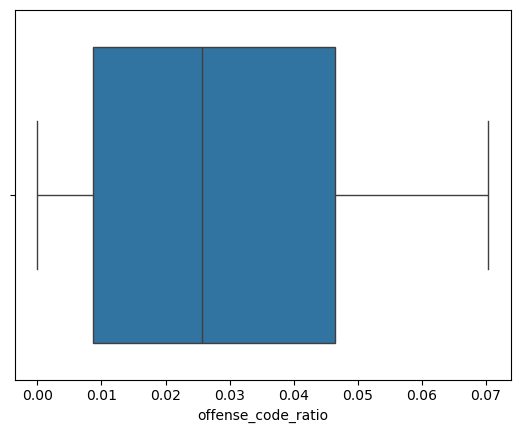

In [228]:
sns.boxplot(x=no_outliers['offense_code_ratio'])

<Axes: xlabel='offense_code_ratio'>

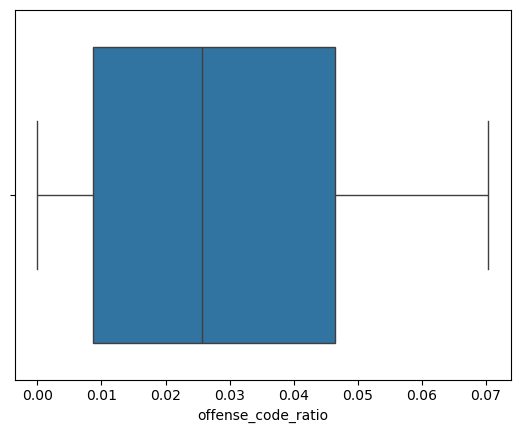

In [230]:
sns.boxplot(x=df['offense_code_ratio'])

<Axes: ylabel='Frequency'>

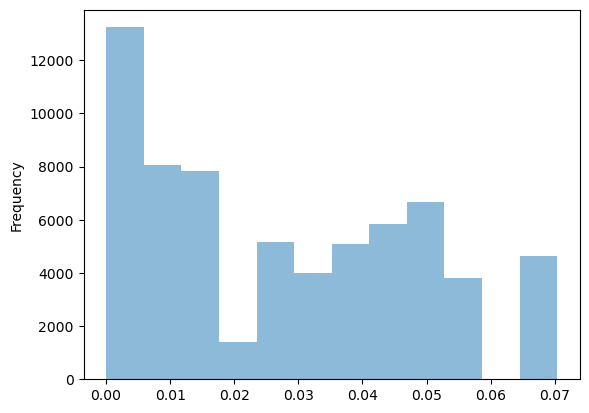

In [232]:
ax = df['offense_code_ratio'].plot.hist(bins=12, alpha=0.5)
ax

In [234]:
df

,offense_code,description,date,year,month,day_of_week,time_period,day,is_weekend,description_length,offense_category,hour,monthly_crime_ratio,day_crime_ratio,offense_code_ratio,hourly_crime_ratio,cumulative_monthly_crime
0,619,LARCENY ALL OTHERS,2018-09-02 13:00:00,2018,9,Sunday,<bound method Series.apply of 0 2018-09...,2,True,18,<bound method Series.apply of 0 619\n1...,13,0.010219,0.123816,0.017579,0.054700,1
1,1402,VANDALISM,2018-08-21 00:00:00,2018,8,Tuesday,<bound method Series.apply of 0 2018-09...,21,False,9,<bound method Series.apply of 0 619\n1...,0,0.126918,0.145379,0.042093,0.046792,1
2,3410,TOWED MOTOR VEHICLE,2018-09-03 19:27:00,2018,9,Monday,<bound method Series.apply of 0 2018-09...,3,False,19,<bound method Series.apply of 0 619\n1...,19,0.010219,0.145151,0.038839,0.053498,2
3,3114,INVESTIGATE PROPERTY,2018-09-03 21:16:00,2018,9,Monday,<bound method Series.apply of 0 2018-09...,3,False,20,<bound method Series.apply of 0 619\n1...,21,0.010219,0.145151,0.038459,0.044648,3
4,3114,INVESTIGATE PROPERTY,2018-09-03 21:05:00,2018,9,Monday,<bound method Series.apply of 0 2018-09...,3,False,20,<bound method Series.apply of 0 619\n1...,21,0.010219,0.145151,0.038459,0.044648,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65754,403,ASSAULT & BATTERY D/W - OTHER,2016-06-14 09:40:00,2016,6,Tuesday,<bound method Series.apply of 0 2018-09...,14,False,29,<bound method Series.apply of 0 619\n1...,9,0.134445,0.145379,0.000046,0.046108,8840
65755,629,LARCENY OTHER $50 TO $199,2016-06-05 17:23:00,2016,6,Sunday,<bound method Series.apply of 0 2018-09...,5,True,25,<bound method Series.apply of 0 619\n1...,17,0.134445,0.123816,0.000030,0.062242,8841
65756,2910,VAL - OPERATING AFTER REV/SUSP.,2016-07-29 18:20:00,2016,7,Friday,<bound method Series.apply of 0 2018-09...,29,False,31,<bound method Series.apply of 0 619\n1...,18,0.130005,0.151523,0.000015,0.063368,8549
65757,1864,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,2018-01-27 14:01:00,2018,1,Saturday,<bound method Series.apply of 0 2018-09...,27,True,43,<bound method Series.apply of 0 619\n1...,14,0.118432,0.140331,0.000015,0.055567,7787


<Axes: xlabel='offense_code_ratio', ylabel='hourly_crime_ratio'>

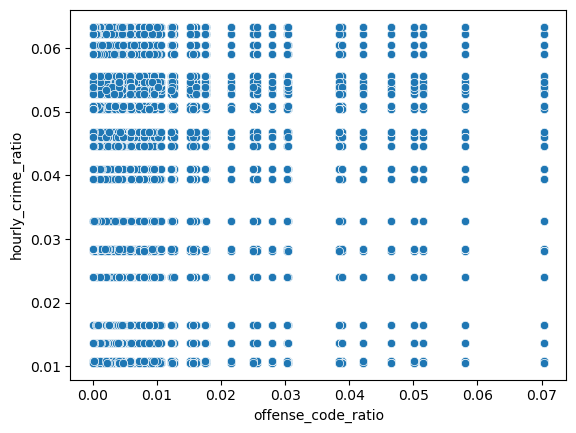

In [238]:
sns.scatterplot(data=no_outliers, x="offense_code_ratio", y="hourly_crime_ratio")

In [250]:
crime_df = no_outliers[['offense_code_ratio', 'hourly_crime_ratio']]
crime_df

,offense_code_ratio,hourly_crime_ratio
0,0.017579,0.054700
1,0.042093,0.046792
2,0.038839,0.053498
3,0.038459,0.044648
4,0.038459,0.044648
...,...,...
65754,0.000046,0.046108
65755,0.000030,0.062242
65756,0.000015,0.063368
65757,0.000015,0.055567


Text(0.5, 1.0, 'crime Heatmap')

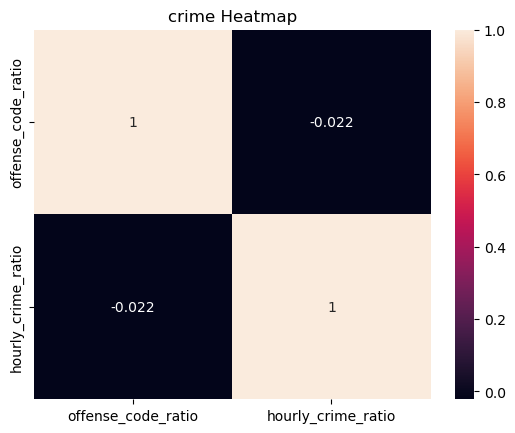

In [252]:
heatmap = sns.heatmap(crime_df.corr(), annot=True)
heatmap.set_title('crime Heatmap')

[Text(0, 0.5, '')]

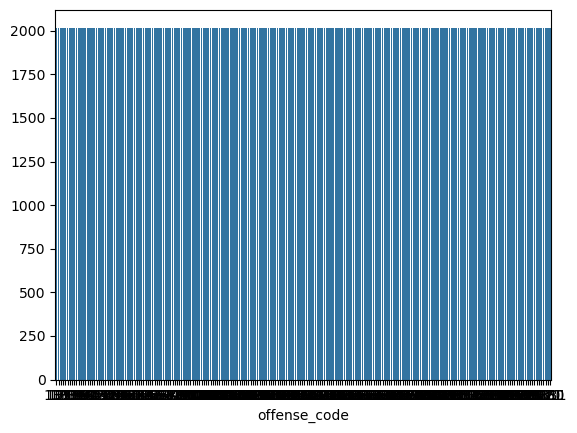

In [256]:
ax = sns.barplot(y='year', x='offense_code', data=no_outliers)
ax.set(ylabel=None)

In [270]:
no_outliers = no_outliers.sort_values(by='offense_code', ascending=False)
no_outliers[['year', 'offense_code']]

,year,offense_code
57460,2018,3831
26255,2018,3831
32929,2018,3831
20653,2018,3831
2070,2018,3831
...,...,...
26689,2018,111
41773,2018,111
10784,2018,111
43622,2018,111


In [274]:
year_grp_series = no_outliers.groupby('year')['offense_code'].sum()
year_grp_series.info()
print(year_grp_series)

<class 'pandas.core.series.Series'>
Index: 4 entries, 2015 to 2018
Series name: offense_code
Non-Null Count  Dtype
--------------  -----
4 non-null      int64
dtypes: int64(1)
memory usage: 48.0 bytes
year
2015         9132
2016        19389
2017        63605
2018    155059645
Name: offense_code, dtype: int64


In [276]:
year_grouped_df = year_grp_series.to_frame().reset_index()
year_grouped_df

,year,offense_code
0,2015,9132
1,2016,19389
2,2017,63605
3,2018,155059645


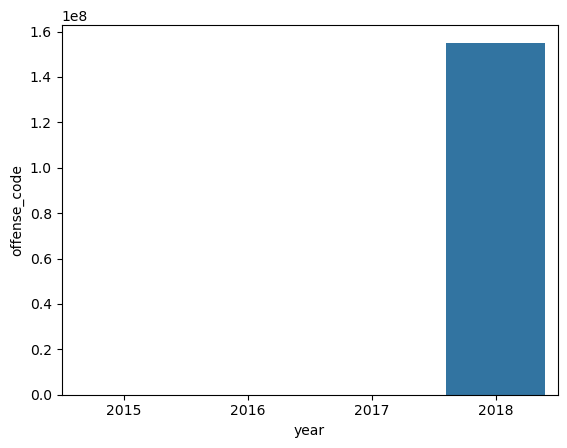

In [284]:
year_grouped_df = year_grouped_df.sort_values(by='offense_code', ascending=False)
crime_rate_plt = sns.barplot(y='offense_code', x='year', data=year_grouped_df)

In [288]:
no_outliers['year_grouped_total_offense_code'] = no_outliers['year'].map(year_grp_series)
no_outliers

,offense_code,description,date,year,month,day_of_week,time_period,day,is_weekend,description_length,offense_category,hour,monthly_crime_ratio,day_crime_ratio,offense_code_ratio,hourly_crime_ratio,cumulative_monthly_crime,year_grouped_total_offense_code
57460,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,2018-02-03 11:25:00,2018,2,Saturday,<bound method Series.apply of 0 2018-09...,3,True,37,<bound method Series.apply of 0 619\n1...,11,0.105583,0.140331,0.051445,0.053909,6415,155059645
26255,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,2018-06-02 14:27:00,2018,6,Saturday,<bound method Series.apply of 0 2018-09...,2,True,37,<bound method Series.apply of 0 619\n1...,14,0.134445,0.140331,0.051445,0.055567,8407,155059645
32929,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,2018-05-08 17:45:00,2018,5,Tuesday,<bound method Series.apply of 0 2018-09...,8,False,37,<bound method Series.apply of 0 619\n1...,17,0.135464,0.145379,0.051445,0.062242,6365,155059645
20653,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,2018-06-21 06:30:00,2018,6,Thursday,<bound method Series.apply of 0 2018-09...,21,False,37,<bound method Series.apply of 0 619\n1...,6,0.134445,0.147067,0.051445,0.016484,2993,155059645
2070,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,2018-08-24 14:00:00,2018,8,Friday,<bound method Series.apply of 0 2018-09...,24,False,37,<bound method Series.apply of 0 619\n1...,14,0.126918,0.151523,0.051445,0.055567,1385,155059645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26689,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",2018-06-01 02:31:00,2018,6,Friday,<bound method Series.apply of 0 2018-09...,1,False,35,<bound method Series.apply of 0 619\n1...,2,0.134445,0.151523,0.000502,0.024042,8780,155059645
41773,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",2018-04-07 17:37:00,2018,4,Saturday,<bound method Series.apply of 0 2018-09...,7,True,35,<bound method Series.apply of 0 619\n1...,17,0.120425,0.140331,0.000502,0.062242,6295,155059645
10784,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",2018-07-26 18:14:00,2018,7,Thursday,<bound method Series.apply of 0 2018-09...,26,False,35,<bound method Series.apply of 0 619\n1...,18,0.130005,0.147067,0.000502,0.063368,1700,155059645
43622,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",2018-03-31 15:55:00,2018,3,Saturday,<bound method Series.apply of 0 2018-09...,31,True,35,<bound method Series.apply of 0 619\n1...,15,0.118204,0.140331,0.000502,0.050959,401,155059645


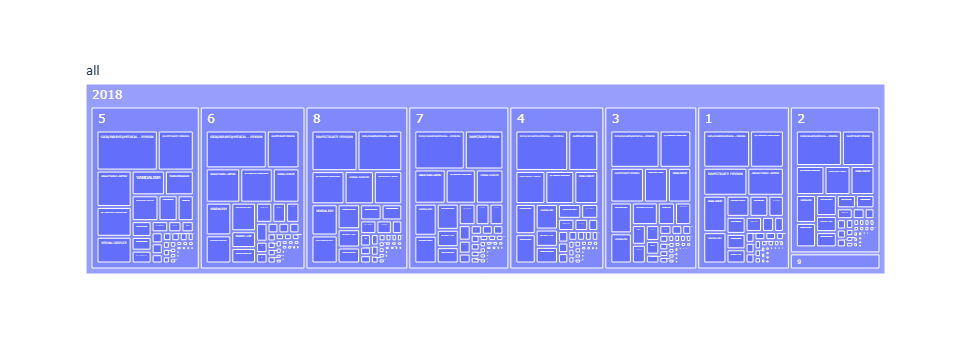

In [299]:
fig = px.treemap(no_outliers, path=[px.Constant("all"), 'year', 'month', 'description'], values='offense_code_ratio', hover_data=['offense_code_ratio'])
fig

In [303]:
df

,offense_code,description,date,year,month,day_of_week,time_period,day,is_weekend,description_length,offense_category,hour,monthly_crime_ratio,day_crime_ratio,offense_code_ratio,hourly_crime_ratio,cumulative_monthly_crime
0,619,LARCENY ALL OTHERS,2018-09-02 13:00:00,2018,9,Sunday,<bound method Series.apply of 0 2018-09...,2,True,18,<bound method Series.apply of 0 619\n1...,13,0.010219,0.123816,0.017579,0.054700,1
1,1402,VANDALISM,2018-08-21 00:00:00,2018,8,Tuesday,<bound method Series.apply of 0 2018-09...,21,False,9,<bound method Series.apply of 0 619\n1...,0,0.126918,0.145379,0.042093,0.046792,1
2,3410,TOWED MOTOR VEHICLE,2018-09-03 19:27:00,2018,9,Monday,<bound method Series.apply of 0 2018-09...,3,False,19,<bound method Series.apply of 0 619\n1...,19,0.010219,0.145151,0.038839,0.053498,2
3,3114,INVESTIGATE PROPERTY,2018-09-03 21:16:00,2018,9,Monday,<bound method Series.apply of 0 2018-09...,3,False,20,<bound method Series.apply of 0 619\n1...,21,0.010219,0.145151,0.038459,0.044648,3
4,3114,INVESTIGATE PROPERTY,2018-09-03 21:05:00,2018,9,Monday,<bound method Series.apply of 0 2018-09...,3,False,20,<bound method Series.apply of 0 619\n1...,21,0.010219,0.145151,0.038459,0.044648,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65754,403,ASSAULT & BATTERY D/W - OTHER,2016-06-14 09:40:00,2016,6,Tuesday,<bound method Series.apply of 0 2018-09...,14,False,29,<bound method Series.apply of 0 619\n1...,9,0.134445,0.145379,0.000046,0.046108,8840
65755,629,LARCENY OTHER $50 TO $199,2016-06-05 17:23:00,2016,6,Sunday,<bound method Series.apply of 0 2018-09...,5,True,25,<bound method Series.apply of 0 619\n1...,17,0.134445,0.123816,0.000030,0.062242,8841
65756,2910,VAL - OPERATING AFTER REV/SUSP.,2016-07-29 18:20:00,2016,7,Friday,<bound method Series.apply of 0 2018-09...,29,False,31,<bound method Series.apply of 0 619\n1...,18,0.130005,0.151523,0.000015,0.063368,8549
65757,1864,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,2018-01-27 14:01:00,2018,1,Saturday,<bound method Series.apply of 0 2018-09...,27,True,43,<bound method Series.apply of 0 619\n1...,14,0.118432,0.140331,0.000015,0.055567,7787


In [ ]:
#The datasets show crime reports thought the years and what crimes they were
#The data cleanings process was mainly getting rid of usless info and irrelevant rows and charts. making things simpler
#The analysis process was mainly a quest to narrow down the data to the year and how many offense codes were in that year
#The Data sets show thatr there as been a huge jump in crime throught the years especially in 2018